In [16]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from catboost import CatBoostRegressor, Pool
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# import warnings
# warnings.filterwarnings('ignore')

Train data shape: (209396, 53)
Test data shape: (52350, 53)

Missing values in train data:
0


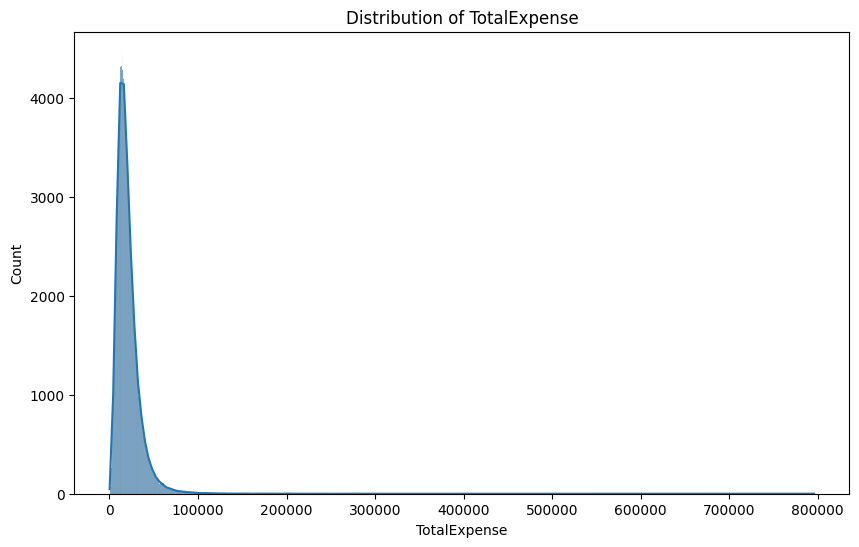


Target variable statistics:
count    209396.000000
mean      20634.906019
std       13835.417251
min         185.000000
25%       12190.354207
50%       17719.835616
75%       25456.787182
max      796075.068493
Name: TotalExpense, dtype: float64


In [17]:
# Load datasets
train_data = pd.read_csv('aggregated_data_train.csv')
test_data = pd.read_csv('aggregated_data_test.csv')

# drop the first column
train_data = train_data.iloc[:, 1:]
test_data = test_data.iloc[:, 1:]


# Display basic information
print(f"Train data shape: {train_data.shape}")
print(f"Test data shape: {test_data.shape}")

# Check for missing values
print("\nMissing values in train data:")
print(train_data.isnull().sum().sum())

# Examine target variable
plt.figure(figsize=(10, 6))
sns.histplot(train_data['TotalExpense'], kde=True)
plt.title('Distribution of TotalExpense')
plt.xlabel('TotalExpense')
plt.show()

print("\nTarget variable statistics:")
print(train_data['TotalExpense'].describe())

In [18]:
# change data type of Is_online_Clothing_Purchased_Last365 to int
# similarly for other columns
    #    'Is_online_Footwear_Purchased_Last365',
    #    'Is_online_Furniture_fixturesPurchased_Last365',
    #    'Is_online_Mobile_Handset_Purchased_Last365',
    #    'Is_online_Personal_Goods_Purchased_Last365',
    #    'Is_online_Recreation_Goods_Purchased_Last365',
    #    'Is_online_Household_Appliances_Purchased_Last365',
    #    'Is_online_Crockery_Utensils_Purchased_Last365',
    #    'Is_online_Sports_Goods_Purchased_Last365',
    #    'Is_online_Medical_Equipment_Purchased_Last365',
    #    'Is_online_Bedding_Purchased_Last365', 'Is_HH_Have_Television',
    #    'Is_HH_Have_Radio', 'Is_HH_Have_Laptop_PC', 'Is_HH_Have_Mobile_handset',
    #    'Is_HH_Have_Bicycle', 'Is_HH_Have_Motorcycle_scooter',
    #    'Is_HH_Have_Motorcar_jeep_van', 'Is_HH_Have_Trucks',
    #    'Is_HH_Have_Animal_cart', 'Is_HH_Have_Refrigerator',
    #    'Is_HH_Have_Washing_machine', 'Is_HH_Have_Airconditioner_aircooler'

train_data['Is_online_Clothing_Purchased_Last365'] = train_data['Is_online_Clothing_Purchased_Last365'].astype(int)
train_data['Is_online_Footwear_Purchased_Last365'] = train_data['Is_online_Footwear_Purchased_Last365'].astype(int)
train_data['Is_online_Furniture_fixturesPurchased_Last365'] = train_data['Is_online_Furniture_fixturesPurchased_Last365'].astype(int)
train_data['Is_online_Mobile_Handset_Purchased_Last365'] = train_data['Is_online_Mobile_Handset_Purchased_Last365'].astype(int)
train_data['Is_online_Personal_Goods_Purchased_Last365'] = train_data['Is_online_Personal_Goods_Purchased_Last365'].astype(int)
train_data['Is_online_Recreation_Goods_Purchased_Last365'] = train_data['Is_online_Recreation_Goods_Purchased_Last365'].astype(int)
train_data['Is_online_Household_Appliances_Purchased_Last365'] = train_data['Is_online_Household_Appliances_Purchased_Last365'].astype(int)
train_data['Is_online_Crockery_Utensils_Purchased_Last365'] = train_data['Is_online_Crockery_Utensils_Purchased_Last365'].astype(int)
train_data['Is_online_Sports_Goods_Purchased_Last365'] = train_data['Is_online_Sports_Goods_Purchased_Last365'].astype(int)
train_data['Is_online_Medical_Equipment_Purchased_Last365'] = train_data['Is_online_Medical_Equipment_Purchased_Last365'].astype(int)
train_data['Is_online_Bedding_Purchased_Last365'] = train_data['Is_online_Bedding_Purchased_Last365'].astype(int)
train_data['Is_HH_Have_Television'] = train_data['Is_HH_Have_Television'].astype(int)
train_data['Is_HH_Have_Radio'] = train_data['Is_HH_Have_Radio'].astype(int)
train_data['Is_HH_Have_Laptop_PC'] = train_data['Is_HH_Have_Laptop_PC'].astype(int)
train_data['Is_HH_Have_Mobile_handset'] = train_data['Is_HH_Have_Mobile_handset'].astype(int)
train_data['Is_HH_Have_Bicycle'] = train_data['Is_HH_Have_Bicycle'].astype(int)
train_data['Is_HH_Have_Motorcycle_scooter'] = train_data['Is_HH_Have_Motorcycle_scooter'].astype(int)
train_data['Is_HH_Have_Motorcar_jeep_van'] = train_data['Is_HH_Have_Motorcar_jeep_van'].astype(int)
train_data['Is_HH_Have_Trucks'] = train_data['Is_HH_Have_Trucks'].astype(int)
train_data['Is_HH_Have_Animal_cart'] = train_data['Is_HH_Have_Animal_cart'].astype(int)
train_data['Is_HH_Have_Refrigerator'] = train_data['Is_HH_Have_Refrigerator'].astype(int)
train_data['Is_HH_Have_Washing_machine'] = train_data['Is_HH_Have_Washing_machine'].astype(int)
train_data['Is_HH_Have_Airconditioner_aircooler'] = train_data['Is_HH_Have_Airconditioner_aircooler'].astype(int)

test_data['Is_online_Clothing_Purchased_Last365'] = test_data['Is_online_Clothing_Purchased_Last365'].astype(int)
test_data['Is_online_Footwear_Purchased_Last365'] = test_data['Is_online_Footwear_Purchased_Last365'].astype(int)
test_data['Is_online_Furniture_fixturesPurchased_Last365'] = test_data['Is_online_Furniture_fixturesPurchased_Last365'].astype(int)
test_data['Is_online_Mobile_Handset_Purchased_Last365'] = test_data['Is_online_Mobile_Handset_Purchased_Last365'].astype(int)
test_data['Is_online_Personal_Goods_Purchased_Last365'] = test_data['Is_online_Personal_Goods_Purchased_Last365'].astype(int)
test_data['Is_online_Recreation_Goods_Purchased_Last365'] = test_data['Is_online_Recreation_Goods_Purchased_Last365'].astype(int)
test_data['Is_online_Household_Appliances_Purchased_Last365'] = test_data['Is_online_Household_Appliances_Purchased_Last365'].astype(int)
test_data['Is_online_Crockery_Utensils_Purchased_Last365'] = test_data['Is_online_Crockery_Utensils_Purchased_Last365'].astype(int)
test_data['Is_online_Sports_Goods_Purchased_Last365'] = test_data['Is_online_Sports_Goods_Purchased_Last365'].astype(int)
test_data['Is_online_Medical_Equipment_Purchased_Last365'] = test_data['Is_online_Medical_Equipment_Purchased_Last365'].astype(int)
test_data['Is_online_Bedding_Purchased_Last365'] = test_data['Is_online_Bedding_Purchased_Last365'].astype(int)
test_data['Is_HH_Have_Television'] = test_data['Is_HH_Have_Television'].astype(int)
test_data['Is_HH_Have_Radio'] = test_data['Is_HH_Have_Radio'].astype(int)
test_data['Is_HH_Have_Laptop_PC'] = test_data['Is_HH_Have_Laptop_PC'].astype(int)
test_data['Is_HH_Have_Mobile_handset'] = test_data['Is_HH_Have_Mobile_handset'].astype(int)
test_data['Is_HH_Have_Bicycle'] = test_data['Is_HH_Have_Bicycle'].astype(int)
test_data['Is_HH_Have_Motorcycle_scooter'] = test_data['Is_HH_Have_Motorcycle_scooter'].astype(int)
test_data['Is_HH_Have_Motorcar_jeep_van'] = test_data['Is_HH_Have_Motorcar_jeep_van'].astype(int)
test_data['Is_HH_Have_Trucks'] = test_data['Is_HH_Have_Trucks'].astype(int)
test_data['Is_HH_Have_Animal_cart'] = test_data['Is_HH_Have_Animal_cart'].astype(int)
test_data['Is_HH_Have_Refrigerator'] = test_data['Is_HH_Have_Refrigerator'].astype(int)
test_data['Is_HH_Have_Washing_machine'] = test_data['Is_HH_Have_Washing_machine'].astype(int)
test_data['Is_HH_Have_Airconditioner_aircooler'] = test_data['Is_HH_Have_Airconditioner_aircooler'].astype(int)

In [19]:
# Define target variable and features
target = 'TotalExpense'
y_train = train_data[target]
X_train = train_data.drop(target, axis=1)

y_test = test_data[target]
X_test = test_data.drop(target, axis=1)

# Identify categorical features
categorical_features = [
    'Sector', 'State', 'NSS-Region', 'District', 
    'Household Type', 'Religion of the head of the household',
    'Social Group of the head of the household', 
    'Is_online_Clothing_Purchased_Last365',
       'Is_online_Footwear_Purchased_Last365',
       'Is_online_Furniture_fixturesPurchased_Last365',
       'Is_online_Mobile_Handset_Purchased_Last365',
       'Is_online_Personal_Goods_Purchased_Last365',
       'Is_online_Recreation_Goods_Purchased_Last365',
       'Is_online_Household_Appliances_Purchased_Last365',
       'Is_online_Crockery_Utensils_Purchased_Last365',
       'Is_online_Sports_Goods_Purchased_Last365',
       'Is_online_Medical_Equipment_Purchased_Last365',
       'Is_online_Bedding_Purchased_Last365', 'Is_HH_Have_Television',
       'Is_HH_Have_Radio', 'Is_HH_Have_Laptop_PC', 'Is_HH_Have_Mobile_handset',
       'Is_HH_Have_Bicycle', 'Is_HH_Have_Motorcycle_scooter',
       'Is_HH_Have_Motorcar_jeep_van', 'Is_HH_Have_Trucks',
       'Is_HH_Have_Animal_cart', 'Is_HH_Have_Refrigerator',
       'Is_HH_Have_Washing_machine', 'Is_HH_Have_Airconditioner_aircooler',
]

# Split the data
# X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# apply log transformation to target variable
y_train_log = np.log1p(y_train)
y_test_log = np.log1p(y_test)

# Create CatBoost Pool objects
train_pool = Pool(data=X_train, label=y_train_log, cat_features=categorical_features)
test_pool = Pool(data=X_test, label=y_test_log, cat_features=categorical_features)

In [20]:
# Mean Absolute Percentage Error calculation
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    # Avoid division by zero
    mask = y_true != 0
    return np.mean(np.abs((y_true[mask] - y_pred[mask]) / y_true[mask])) * 100

In [22]:
# Initialize and train baseline model
baseline_model = CatBoostRegressor(
    iterations=4000,
    learning_rate=0.03,
    depth=6,
    loss_function='RMSE',
    eval_metric='RMSE',
    random_seed=42,
    verbose=100
)

baseline_model.fit(train_pool, eval_set=test_pool, early_stopping_rounds=50)

# Predict and evaluate
test_preds = baseline_model.predict(X_test)
test_preds = np.expm1(test_preds)

# Calculate metrics
mae = mean_absolute_error(y_test, test_preds)
rmse = np.sqrt(mean_squared_error(y_test, test_preds))
r2 = r2_score(y_test, test_preds)
mape = mean_absolute_percentage_error(y_test, test_preds)

print("\nBaseline Model Evaluation:")
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.4f}")
print(f"MAPE: {mape:.2f}%")



0:	learn: 0.5795320	test: 0.5820521	best: 0.5820521 (0)	total: 288ms	remaining: 19m 10s
100:	learn: 0.3467350	test: 0.3488924	best: 0.3488924 (100)	total: 21.1s	remaining: 13m 35s
200:	learn: 0.3272872	test: 0.3289372	best: 0.3289372 (200)	total: 41.6s	remaining: 13m 5s
300:	learn: 0.3208241	test: 0.3226495	best: 0.3226495 (300)	total: 1m 2s	remaining: 12m 44s
400:	learn: 0.3173398	test: 0.3193532	best: 0.3193532 (400)	total: 1m 23s	remaining: 12m 28s
500:	learn: 0.3146495	test: 0.3168488	best: 0.3168488 (500)	total: 1m 45s	remaining: 12m 17s
600:	learn: 0.3125054	test: 0.3149672	best: 0.3149672 (600)	total: 2m 7s	remaining: 12m
700:	learn: 0.3106636	test: 0.3133959	best: 0.3133959 (700)	total: 2m 29s	remaining: 11m 42s
800:	learn: 0.3092041	test: 0.3122375	best: 0.3122375 (800)	total: 2m 45s	remaining: 11m 1s
900:	learn: 0.3078717	test: 0.3111990	best: 0.3111990 (900)	total: 3m 1s	remaining: 10m 25s
1000:	learn: 0.3067896	test: 0.3103843	best: 0.3103843 (1000)	total: 3m 16s	remaining:

<Figure size 1200x800 with 0 Axes>

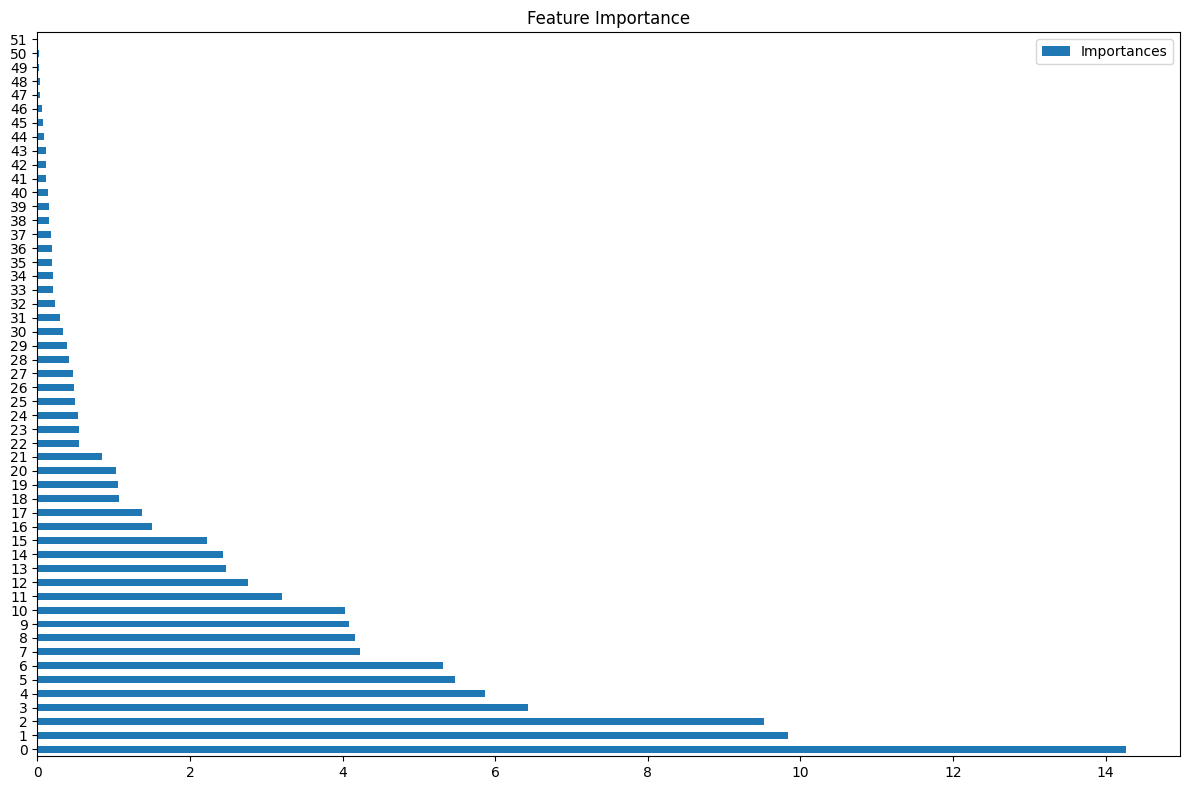

In [15]:
# Feature importance
plt.figure(figsize=(12, 8))
feature_importance = baseline_model.get_feature_importance(prettified=True)
feature_importance.plot(kind='barh', figsize=(12, 8))
plt.title('Feature Importance')
plt.tight_layout()
plt.show()

In [ ]:
# Define parameter grid for tuning
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1],
    'depth': [4, 6, 8],
    'l2_leaf_reg': [1, 3, 5],
    'iterations': [500, 1000],
    'border_count': [32, 64]
}

# Initialize model for grid search
catboost_model = CatBoostRegressor(
    loss_function='RMSE',
    eval_metric='RMSE',
    random_seed=42,
    verbose=0
)

# Perform grid search with cross-validation
print("Starting hyperparameter tuning with GridSearchCV...")
grid_search = GridSearchCV(
    estimator=catboost_model,
    param_grid=param_grid,
    cv=3,
    scoring='neg_mean_squared_error',
    verbose=1,
    n_jobs=-1
)

grid_search.fit(X_train, y_train, cat_features=categorical_features)

# Print best parameters
print("\nBest Parameters:", grid_search.best_params_)
print("Best CV RMSE Score:", np.sqrt(-grid_search.best_score_))

In [ ]:
# Train model with best parameters
best_model = CatBoostRegressor(
    **grid_search.best_params_,
    loss_function='RMSE',
    eval_metric='RMSE',
    random_seed=42,
    verbose=100
)

best_model.fit(train_pool, eval_set=val_pool, early_stopping_rounds=50)

# Evaluate best model
val_preds_best = best_model.predict(X_val)
mae_best = mean_absolute_error(y_val, val_preds_best)
rmse_best = np.sqrt(mean_squared_error(y_val, val_preds_best))
r2_best = r2_score(y_val, val_preds_best)
mape_best = mean_absolute_percentage_error(y_val, val_preds_best)

print("\nTuned Model Evaluation:")
print(f"MAE: {mae_best:.2f}")
print(f"RMSE: {rmse_best:.2f}")
print(f"R²: {r2_best:.4f}")
print(f"MAPE: {mape_best:.2f}%")

# Compare with baseline
print("\nImprovement over baseline:")
print(f"MAE improvement: {mae - mae_best:.2f} ({(mae - mae_best) / mae * 100:.2f}%)")
print(f"RMSE improvement: {rmse - rmse_best:.2f} ({(rmse - rmse_best) / rmse * 100:.2f}%)")
print(f"R² improvement: {r2_best - r2:.4f}")
print(f"MAPE improvement: {mape - mape_best:.2f}%")

In [ ]:
# Actual vs Predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_val, val_preds_best, alpha=0.5)
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'r--')
plt.xlabel('Actual TotalExpense')
plt.ylabel('Predicted TotalExpense')
plt.title('Actual vs Predicted Values')
plt.tight_layout()
plt.show()

# Residuals plot
residuals = y_val - val_preds_best
plt.figure(figsize=(10, 6))
plt.scatter(val_preds_best, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='-')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.tight_layout()
plt.show()

# Distribution of residuals
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.title('Distribution of Residuals')
plt.tight_layout()
plt.show()

In [ ]:
# Create test pool
test_pool = Pool(data=test_data, cat_features=categorical_features)

# Generate predictions
test_preds = best_model.predict(test_pool)

# Create output dataframe
output_df = pd.DataFrame({
    'Predicted_TotalExpense': test_preds
})

# Save predictions
output_df.to_csv('catboost_predictions.csv', index=False)
print("Predictions saved to 'catboost_predictions.csv'")

# Save the best model
best_model.save_model('catboost_total_expense_model.cbm')
print("Model saved as 'catboost_total_expense_model.cbm'")